# Summarization of our first data analysis
We will practice arranging, interpreting and visualization for all the questions
- Is there any relationship between who a person works for and their performance score?
- What is the overall diversity profile of the organization?
- What are our best recruiting sources if we want to ensure a diverse organization?
- Can we predict who is going to terminate and who isn't? What level of accuracy can we achieve on this?
- Are there areas of the company where pay is not equitable?

In [ ]:
!conda install pandas numpy seaborn matplotlib

Solving environment: \ 

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
hr_data = pd.read_csv(r"dataset/HRDataset_v14.csv")

In [17]:
# check what is in the dataset
# find the missing value
# find duplicates
# find unique values

In [10]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [8]:
hr_data.isnull().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

In [16]:
unique_value = hr_data.nunique()
print(unique_value)

Employee_Name                 311
EmpID                         311
MarriedID                       2
MaritalStatusID                 5
GenderID                        2
EmpStatusID                     5
DeptID                          6
PerfScoreID                     4
FromDiversityJobFairID          2
Salary                        308
Termd                           2
PositionID                     30
Position                       32
State                          28
Zip                           158
DOB                           307
Sex                             2
MaritalDesc                     5
CitizenDesc                     3
HispanicLatino                  4
RaceDesc                        6
DateofHire                    101
DateofTermination              96
TermReason                     18
EmploymentStatus                3
Department                      6
ManagerName                    21
ManagerID                      23
RecruitmentSource               9
PerformanceSco

In [19]:
duplicate_values = hr_data.duplicated().sum()
print("No. of duplicated values: ",duplicate_values)

No. of duplicated values:  0


# 1. Is there any relationship between who a person works for and their performance score?
- what will you look into it?
- Good managers and other managers and their employees' PerfScoreID
- ManagerName and employees' PerfScoreID
- Visual chart

In [22]:
# First we need to calculate the average PerfScoreID for each manager
manager_perf_score= hr_data.groupby('ManagerName')['PerfScoreID'].mean()

#Second we need to define a threshold for what you consider as 'good' managers
good_manager_threshold= 3

#Then we create a list of good managers
good_managers = manager_perf_score[manager_perf_score >good_manager_threshold].index.tolist()

# Categories each employee based on whether they work for 'good' managers or not
hr_data['WorksforManager']=hr_data['ManagerName'].apply(lambda x: "Yes" if x in good_managers else "No")

#compare the avg.salaries
avg_sal_comparison = hr_data.groupby('WorksforManager')['Salary'].mean()

print(avg_sal_comparison)

WorksforManager
No     63181.919811
Yes    81523.898990
Name: Salary, dtype: float64


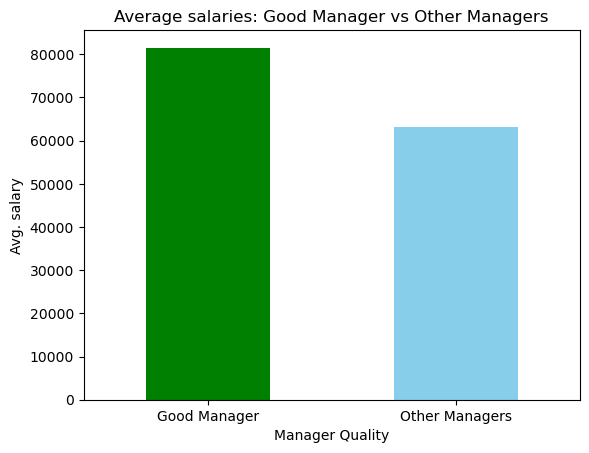

In [24]:
# visualisation
#Identify good managers based on the performance score threshold
manager_performance = hr_data.groupby('ManagerName')['PerfScoreID'].mean()
good_managers = manager_performance[manager_performance>3].index.tolist()

# Flag employees who work for 'good' managers
hr_data['ManagerQuality'] =hr_data['ManagerName'].apply(lambda x: 'Good Manager' if x in good_managers else 'Other Managers')

# Calculate average salaries of each group
avg_sal_by_manager_quality= hr_data.groupby('ManagerQuality')['Salary'].mean()

#Plot bar chart
avg_sal_by_manager_quality.plot(kind='bar', color =['green','skyblue'])
plt.title('Average salaries: Good Manager vs Other Managers')
plt.xlabel('Manager Quality')
plt.xticks(rotation=0)
plt.ylabel('Avg. salary')
plt.show()

# What is the overall diversity profile of the organization?
- calculate the count and percentage of each race
- also calculate for each gender


In [10]:
race_counts = hr_data['RaceDesc'].value_counts()
race_percentage = hr_data['RaceDesc'].value_counts(normalize = True)*100

gender_counts = hr_data['RaceDesc'].value_counts()
gender_percentage = hr_data['GenderID'].value_counts(normalize =True)*100

(race_counts, race_percentage, gender_counts, gender_percentage)

(White                               187
 Black or African American            80
 Asian                                29
 Two or more races                    11
 American Indian or Alaska Native      3
 Hispanic                              1
 Name: RaceDesc, dtype: int64,
 White                               60.128617
 Black or African American           25.723473
 Asian                                9.324759
 Two or more races                    3.536977
 American Indian or Alaska Native     0.964630
 Hispanic                             0.321543
 Name: RaceDesc, dtype: float64,
 White                               187
 Black or African American            80
 Asian                                29
 Two or more races                    11
 American Indian or Alaska Native      3
 Hispanic                              1
 Name: RaceDesc, dtype: int64,
 0    56.59164
 1    43.40836
 Name: GenderID, dtype: float64)

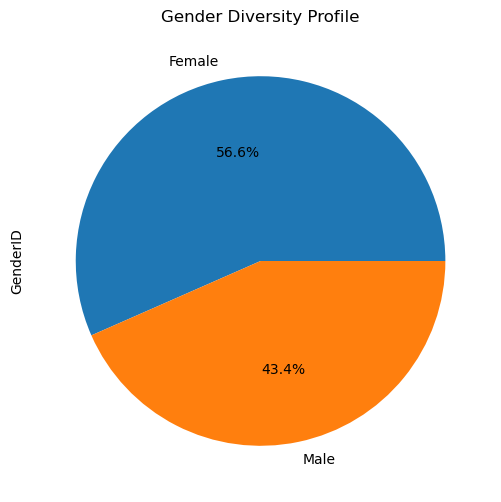

In [19]:
gender_diversity = hr_data['GenderID'].value_counts(normalize= True)
plt.figure(figsize=(6,6))
gender_diversity.plot(kind ='pie', labels=['Female','Male'], autopct = '%1.1f%%')
plt.title('Gender Diversity Profile')
plt.show()